The data generation step is adopted from the url https://notebooks.azure.com/cntk/libraries/tutorials/html/CNTK_101_LogisticRegression.ipynb

In [79]:
input_dim = 2
num_output_classes = 2
sample_size = 32

In [80]:
import numpy

In [81]:
# Ensure that we always get the same results
numpy.random.seed(0)

# Create synthetic data using NumPy. 
labels = numpy.random.randint(size=(sample_size, 1), low=0, high=num_output_classes)

# Make sure that the data is separable 
features = (numpy.random.randn(sample_size, input_dim)+3) * (labels+1)

# Specify the data type to match the input variable used later in the tutorial 
# (default type is double)
features = features.astype(numpy.float32)    

# convert class 0 into the vector "1 0 0", 
# class 1 into the vector "0 1 0", ...
class_ind = [labels==class_number for class_number in range(num_output_classes)]
labels = numpy.asarray(numpy.hstack(class_ind), dtype=numpy.float32)


In [82]:
age = features[:,0]

In [83]:
tumorsize = features[:,1]

In [84]:
# let 0 represent malignant/red and 1 represent benign/blue 
colors = ['r' if label == 0 else 'b' for label in labels[:,0]]

In [85]:
import matplotlib.pyplot

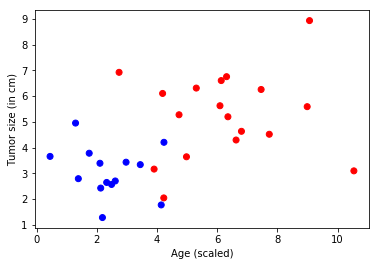

In [86]:
matplotlib.pyplot.scatter(age, tumorsize, c=colors)
matplotlib.pyplot.xlabel("Age (scaled)")
matplotlib.pyplot.ylabel("Tumor size (in cm)")
matplotlib.pyplot.show()

###### Below is the The neural network architecture
###### We can also use this code to draw this https://gist.github.com/craffel/2d727968c3aaebd10359
<img src='https://www.cntk.ai/jup/logistic_neuron2.jpg' , width=300, height=200/>

In [87]:
import keras

In [88]:
import keras.models

In [89]:
model = keras.models.Sequential()

In [90]:
import keras.activations
activation_func = keras.activations.sigmoid

In [91]:
import keras.layers

In [92]:
inputlayer = keras.layers.Dense(1,activation=activation_func,input_dim=features.shape[1])

In [93]:
model.add(inputlayer)

In [94]:
import keras.optimizers

In [95]:
rmsprop_optimizer = keras.optimizers.RMSprop()

In [96]:
import keras.losses

In [97]:
lossfunc= keras.losses.binary_crossentropy

In [98]:
model.compile(optimizer=rmsprop_optimizer, loss=lossfunc)

In [113]:
BATCH_SIZE = 128
NO_OF_EPOCHS = 20 ## No Of Epochs
VERBOSE = 1  ## we wanted to see the output
VALIDATION_SPLIT = 0.2 

In [114]:
features_train = features[:25]

In [115]:
labels_train = labels[:25]

In [116]:
modelhistory = model.fit(features_train, labels_train, batch_size=BATCH_SIZE,epochs=NO_OF_EPOCHS,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)

ValueError: Error when checking target: expected dense_6 to have shape (None, 1) but got array with shape (25, 2)